# US BABY NAMES 1880-2010 Analysis 

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present.

# Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

The names of the baby is stored in different file yearly .Merge all the files into a single dataframe

In [2]:
pieces=[]
for years in range(1880,2011):
    path="D:/names/yob%d.txt" %years
    names_data=pd.read_csv(path ,names=["Name","Gender","Birth"])
    names_data["year"]=years 
    pieces.append(names_data)
name=pd.concat(pieces,ignore_index=True)
name.

,Name,Gender,Birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692316,Zymaire,M,5,2010
1692317,Zyonne,M,5,2010
1692318,Zyquarius,M,5,2010
1692319,Zyran,M,5,2010


Now we find the total Male and Female in each year and plot the graph

<AxesSubplot:xlabel='year'>

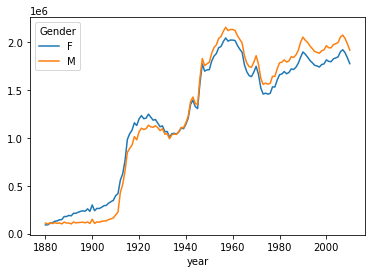

In [3]:
total_birth=name["Birth"].groupby([name["year"],name["Gender"]]).sum().unstack()
total_birth.plot()

In [4]:
#for (k1,k2),name in name.groupby([name["year"],name["Gender"]]):
 #   print((k1,k2))
  #  print(name)

# Add column prop


This column contains the percentage of each baby name. For eg.: A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name

In [5]:
def add_prop(group):
    group["prop"]=group["Birth"]/group["Birth"].sum()
    return group
name=name.groupby([name["year"],name["Gender"]]).apply(add_prop)
name.head()

,Name,Gender,Birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


When performing a operation like this ,it's often valuable to do a sanity check, like verfying that prop column sums to 1 within all groups

In [6]:
name["prop"].groupby([name["year"],name["Gender"]]).sum()

year  Gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2008  M         1.0
2009  F         1.0
      M         1.0
2010  F         1.0
      M         1.0
Name: prop, Length: 262, dtype: float64

Now create a subset by selecting top 1000 names for each gender or year combibnation for further analysis

In [7]:
def order(group):
    group=group.sort_values(by="prop",ascending=False)[:1000]
    return group
top1000=name.groupby([name["year"],name["Gender"]]).apply(order)
top1000.reset_index(inplace=True,drop=True)
top1000

,Name,Gender,Birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


# Analysing Naming Trends

Split the dataset of top1000 babies names in boys and girl

In [8]:
boys=top1000[top1000["Gender"]=="M"]
girls=top1000[top1000["Gender"]=="F"]

In [9]:
total_birth=top1000["Birth"].groupby([top1000["Name"],top1000["year"]]).sum()
total_birth                                      

Name     year
Aaden    2008     957
         2009    1267
         2010     450
Aaliyah  1994    1451
         1995    1255
                 ... 
Zula     1931      59
         1932      50
         1933      58
         1935      51
Zuri     2010     259
Name: Birth, Length: 247842, dtype: int64

array([<AxesSubplot:xlabel='Name,year'>], dtype=object)

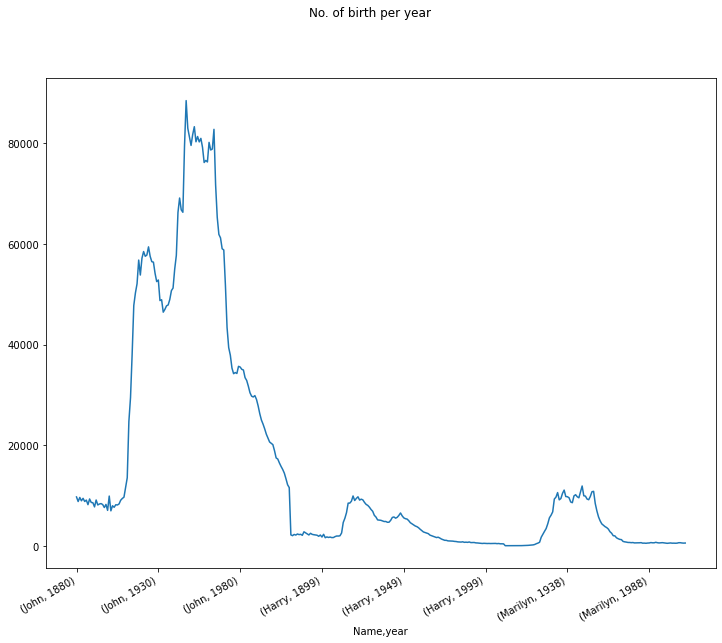

In [10]:
subset=total_birth[["John","Harry","Marry","Marilyn"]]
subset.plot(subplots=True ,figsize=(12,10),grid=False,title="No. of birth per year")

On looking at the above graph ,we might conclude that these names have grown out of favour with the american population 


# Measuring the name diversity


One measure is the proportion of births represented by the top1000 most popular names,which is aggregated and plot by year and gender

<AxesSubplot:title={'center':'Sum of table1000.prop by year and Gender'}, xlabel='year'>

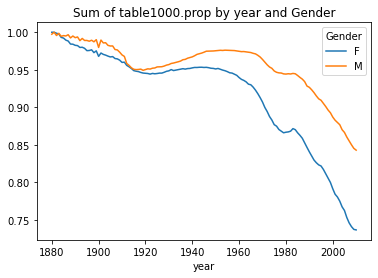

In [11]:
table=top1000.pivot_table("prop",index="year",columns="Gender",aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and Gender")

Now to create a subset of boys from the year 2010

In [12]:
boys2000=boys[boys["year"]==2010]
boys2000.head()

,Name,Gender,Birth,year,prop
260876,Jacob,M,22139,2010,0.011548
260877,Ethan,M,18006,2010,0.009392
260878,Michael,M,17361,2010,0.009056
260879,Jayden,M,17189,2010,0.008966
260880,William,M,17058,2010,0.008897


Now sort the dataset into the descending order by prop column and then taken the cummulative of prop and then calling the method searchsorted return the postion in the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order  

In [13]:
prop_cumsum_2010=boys2000["prop"].sort_values(ascending=False).cumsum()
prop_cumsum_2010.values.searchsorted(0.5)

116

Since arrays are-zero indexed,adding 1 to this result gives you a result of 117.In contrast ,in 1900 this number was much smaller

In [14]:
boys1900=boys[boys["year"]==1900]
boys1900.head()

,Name,Gender,Birth,year,prop
40876,John,M,9829,1900,0.065319
40877,William,M,8579,1900,0.057012
40878,James,M,7245,1900,0.048147
40879,George,M,5403,1900,0.035906
40880,Charles,M,4098,1900,0.027233


In [15]:
prop_cumsum_1900=boys1900["prop"].sort_values(ascending=False).cumsum()
(prop_cumsum_1900.searchsorted(0.5))+1

25

Now you can apply this operation to each year/gender combination ,groupby those fields and apply a function returning the count for each group


In [16]:
def prop_cum(group):
    group=group["prop"].sort_values(ascending=False).cumsum()
    return (group.searchsorted(0.5)+1)
prop_cum_sum=top1000.groupby([top1000["year"],top1000["Gender"]]).apply(prop_cum)
prop_cum_sum=prop_cum_sum.unstack("Gender")
prop_cum_sum.head()

Gender,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'No. of Popular names in top 50%'}, xlabel='year'>

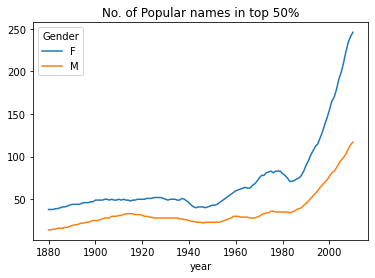

In [17]:
prop_cum_sum.plot(title="No. of Popular names in top 50%")

# The "last letter" revolution

In 2007 ,baby name researcher laura Watternberg pointed out on her website that the distribution of boys names by final letters has changed significantly over the last 100 years."To see this ,we first aggregate all of the births in the full dataset by year,sex and final letters

In [23]:
get_last_letter = lambda x:x[-1]
last_letter = name["Name"].map(get_last_letter)
last_letter.name="last_letter" 

In [24]:
table=name.pivot_table("Birth",index=last_letter,columns=["Gender","year"],aggfunc=sum)

Then we select our three representative year spanning the history and print the first few rows

In [25]:
subtable=table.reindex(columns=[1910,1960,2010],level="year")
subtable.head()

Gender              F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691278.0  677100.0    977.0    5212.0   28882.0
b                 NaN     694.0     455.0    411.0    3911.0   39294.0
c                 5.0      49.0     957.0    482.0   15457.0   23357.0
d              6751.0    3731.0    2645.0  22113.0  262120.0   44851.0
e            133601.0  435023.0  316878.0  28665.0  178760.0  130307.0

Now normalize the table by total birh to compute a new table containing proportion of total birth for each gender ending in each letter

In [27]:
subtable.sum()

Gender  year
F       1910     396505.0
        1960    2022012.0
        2010    1775986.0
M       1910     194210.0
        1960    2132115.0
        2010    1917177.0
dtype: float64

In [33]:
letter_prop=subtable/subtable.sum()
letter_prop.tail()

Gender              F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007708  0.016183
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152555  0.116760  0.077344  0.160993  0.058201
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

With the letters proportion in hand,we can make bar plots for each gender broken down by year 

<AxesSubplot:title={'center':'Male'}, xlabel='last_letter'>

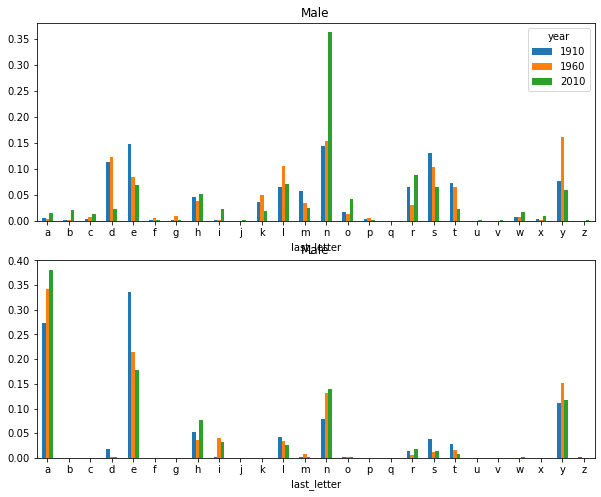

In [32]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop["M"].plot(kind="bar",rot=0,ax=axes[0],title="Male")
letter_prop["F"].plot(kind="bar",rot=0,ax=axes[1],title="Male",legend=False)

# Boy name that became girl name (and vis versa)

Another fun trend is looking at the boy names that were more popular with one gender earlier in the sample but have "changed gender" in the present.For eg:- the name Lesley or lesLie.Going back to top1000 DataFrame,I compute a list of names occuring in the dataset starting with "lesl"

In [19]:
name_start_with_lesl=top1000[top1000["Name"].str.lower().str.contains("lesl")]
name_start_with_lesl

,Name,Gender,Birth,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4511,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256326,Lesly,F,699,2008,0.000370
258035,Leslie,F,1982,2009,0.001080
258380,Lesly,F,598,2009,0.000326
260074,Leslie,F,1565,2010,0.000881


Now group the dataset by name and sum the birth to find the relative frequencies.


In [20]:
relative_frequency_of_lesl = name_start_with_lesl["Birth"].groupby(name_start_with_lesl["Name"]).sum()
relative_frequency_of_lesl

Name
Leslee      1082
Lesley     35037
Lesli        929
Leslie    370579
Lesly      10072
Name: Birth, dtype: int64

Now aggregate by Gender and year and normalize within year

In [21]:
table=name_start_with_lesl.pivot_table("Birth",index="year",columns="Gender",aggfunc=sum)
table=table.div(table.sum(1),axis=0)
table.tail()

Gender,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


Now its time to plot the breakdown by gender aover time 

<AxesSubplot:xlabel='year'>

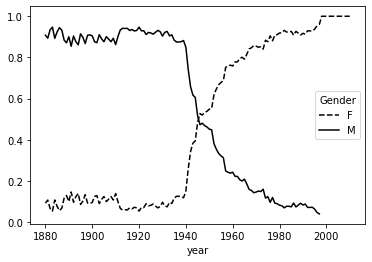

In [22]:
table.plot(style={"M":"k-","F":"k--"})